In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import unicodecsv
import seaborn as sns
%matplotlib inline


/Users/edwardward/anaconda/envs/Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
## Read csv file
titanic_data = pd.read_csv('/Users/edwardward/P2/titanic_data.csv')

In [3]:
## get a snapshot of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Create Columns that will represent Male & Female as Binary options 1 = yes, 0 = no
titanic_data['Male'] = titanic_data['Sex']
titanic_data['Female'] = titanic_data['Sex']

## Create functions for converting gender from string to int
def male_female_number(string):
    if string == 'male':
        return 1
    elif string == 'female':
        return 0
    else:
        return string
    
def female_male_number(string):
    if string == 'female':
        return 1
    elif string == 'male':
        return 0
    else:
        return string

In [5]:
## Create function for applying the string to int converter along columns
def convert_gender_to_number_male(data):
    return data.apply(male_female_number)

def convert_gender_to_number_female(data):
    return data.apply(female_male_number)

In [6]:
## Update the data in the main array using the fucntion
titanic_data['Male'] = convert_gender_to_number_male(titanic_data['Male'])
titanic_data['Female'] = convert_gender_to_number_female(titanic_data['Female'])

In [7]:
## Check object types
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Male           891 non-null int64
Female         891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [8]:
## Get a quick statistical overview of the data
titanic_data.describe()

/Users/edwardward/anaconda/envs/Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [9]:
titanic_data.sum()

PassengerId    397386.0000
Survived          342.0000
Pclass           2057.0000
Age             21205.1700
SibSp             466.0000
Parch             340.0000
Fare            28693.9493
Male              577.0000
Female            314.0000
dtype: float64

In [10]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
## define correlations for the titanic data
correlations = titanic_data.corr()

In [12]:
## Describe correlations across variables, using spearman
titanic_data.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975,0.042939,-0.042939
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,-0.543351,0.543351
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,0.135775,-0.135775
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,0.083330,-0.083330
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,-0.195204,0.195204
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,-0.254512,0.254512
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,-0.259593,0.259593
Male,0.042939,-0.543351,0.135775,0.083330,-0.195204,-0.254512,-0.259593,1.000000,-1.000000
Female,-0.042939,0.543351,-0.135775,-0.083330,0.195204,0.254512,0.259593,-1.000000,1.000000


In [13]:
## List the correlations with survived
correlations['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Male          -0.543351
Female         0.543351
Name: Survived, dtype: float64

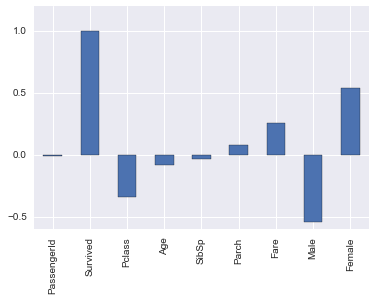

In [14]:
## Plot Correlations
correlations['Survived'].plot.bar()

In [15]:
## group data by Passenger Class
groupby_Pclass = titanic_data.groupby(['Pclass'])

In [57]:
## Count the number of Survivors and number of Total in each Pclass
groupby_Pclass_Survived = groupby_Pclass['Survived'].sum()
groupby_Pclass_Total = groupby_Pclass['PassengerId'].count()

In [17]:
## Get the percentage of each Pclass that survived 
groupby_Pclass_percent_survived = 500.0 *(groupby_Pclass_Survived)/groupby_Pclass_Total

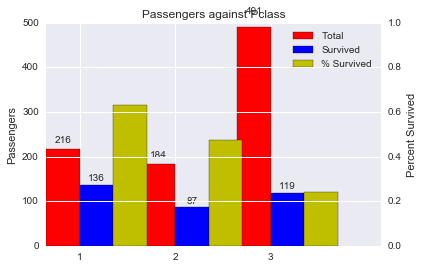

In [18]:
##code edited from http://matplotlib.org/examples/api/barchart_demo.html##
## Create a bar chart that compares Total, Survivors and % survived for each Pclass
N = 3


ind = np.arange(N)  # the x locations forthe groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, groupby_Pclass_Total, width, color='r')


rects2 = ax.bar(ind + width, groupby_Pclass_Survived, width, color='b')

rects3 = ax.bar(ind + width + width, groupby_Pclass_percent_survived, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Passengers')
ax.set_title('Passengers against Pclass')
ax.set_xticks(ind + width)
ax.set_xticklabels(('1', '2', '3'))

ax.legend((rects1[0], rects2[0],rects3[0]), ('Total', 'Survived','% Survived'))

ax2 = ax.twinx()
ax2.set_ylabel('Percent Survived')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()

In [19]:
groupby_Pclass.sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Male,Female
Pclass,,,,,,,,
1,99705,136,7111.42,90,77,18177.4125,122,94
2,82056,87,5168.83,74,70,3801.8417,108,76
3,215625,119,8924.92,302,193,6714.6951,347,144


In [67]:
## check for any major differences in gender distribution in each Pclass


1.29787234043
1.42105263158
2.40972222222


In [21]:
## check for any major differences the means of other variables in each Pclass
groupby_Pclass.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Male,Female
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.564815,0.435185
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.586957,0.413043
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.706721,0.293279


In [22]:
## Groupby sex then Pclass
groupby_Pclass_Sex = titanic_data.groupby(['Sex','Pclass'])

In [23]:
## Show means check for any major differences between groups that might be influencing the survival rates
groupby_Pclass_Sex.mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  Male  Female  
Sex    Pclass                            
female 1       106.125798   0.0     1.0  
       2        21.970121   0.0     1.0  
       3        16.118810   0.0     1.0  
male   1        67.226127   1.0     0.0  
       2        19.741782   1.0     0.0  
       3        12.661633   1.0     0.0

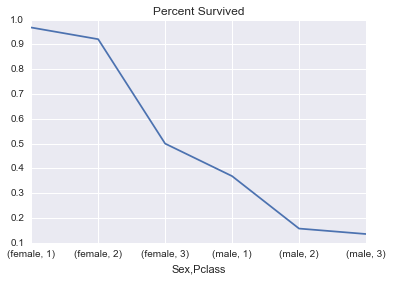

In [24]:
## Plot the survival rates for Gender & Pclass groups
groupby_Pclass_Sex['Survived'].mean().plot(title='Percent Survived',)

In [25]:
## Groupby Gender
groupby_Sex = titanic_data.groupby(['Sex'])

In [26]:
groupby_Sex.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female
Sex,,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.0,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0,0.0


In [27]:
groupby_Sex.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
Sex,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314,314
male,577,577,577,577,453,577,577,577,577,107,577,577,577


In [28]:
groupby_Sex.corr()

Age      Fare  Female  Male     Parch  PassengerId  \
Sex                                                                           
female Age          1.000000  0.171468     NaN   NaN -0.118539     0.085899   
       Fare         0.171468  1.000000     NaN   NaN  0.073398     0.063155   
       Female            NaN       NaN     NaN   NaN       NaN          NaN   
       Male              NaN       NaN     NaN   NaN       NaN          NaN   
       Parch       -0.118539  0.073398     NaN   NaN  1.000000     0.113805   
       PassengerId  0.085899  0.063155     NaN   NaN  0.113805     1.000000   
       Pclass      -0.386217 -0.634771     NaN   NaN  0.143976    -0.117476   
       SibSp       -0.241442  0.093852     NaN   NaN  0.295385     0.000869   
       Survived     0.116109  0.218466     NaN   NaN -0.223644    -0.008790   
male   Age          1.000000  0.077331     NaN   NaN -0.232419     0.006191   
       Fare         0.077331  1.000000     NaN   NaN  0.312197    -0.009578   
       Female            NaN       NaN     NaN   NaN       NaN          NaN   
       Male              NaN       NaN     NaN   NaN       NaN          NaN   
       Parch       -0.232419  0.312197     NaN   NaN  1.000000    -0.084980   
       PassengerId  0.006191 -0.009578     NaN   NaN -0.084980     1.000000   
       Pclass      -0.392754 -0.472452     NaN   NaN -0.031481     0.002336   
       SibSp       -0.334982  0.181804     NaN   NaN  0.524849    -0.084884   
       Survived    -0.119618  0.171288     NaN   NaN  0.096318     0.040477   

                      Pclass     SibSp  Survived  
Sex                                               
female Age         -0.386217 -0.241442  0.116109  
       Fare        -0.634771  0.093852  0.218466  
       Female            NaN       NaN       NaN  
       Male              NaN       NaN       NaN  
       Parch        0.143976  0.295385 -0.223644  
       PassengerId -0.117476  0.000869 -0.008790  
       Pclass       1.000000  0.136263 -0.477114  
       SibSp        0.136263  1.000000 -0.263284  
       Survived    -0.477114 -0.263284  1.000000  
male   Age         -0.392754 -0.334982 -0.119618  
       Fare        -0.472452  0.181804  0.171288  
       Female            NaN       NaN       NaN  
       Male              NaN       NaN       NaN  
       Parch       -0.031481  0.524849  0.096318  
       PassengerId  0.002336 -0.084884  0.040477  
       Pclass       1.000000  0.076957 -0.220618  
       SibSp        0.076957  1.000000 -0.020238  
       Survived    -0.220618 -0.020238  1.000000

In [30]:
## Add a new column that will show Adult vs Child
titanic_data['Under_18'] = titanic_data['Age'] 

In [31]:
## Set up function that takes in Age and returns if the passenger is a child or adult (>18)
def age(x):
    if x == 'NaN':
        return x
    elif x > 18:
        return 'Adult'
    elif x <=18:
        return 'Child'
    else:
        return 'NaN'
        
    
titanic_data['Under_18'] = titanic_data['Under_18'].apply(age)


In [32]:
## Groupby Age
groupby_age = titanic_data.groupby(titanic_data['Under_18'])

In [33]:
## Groupby Gender then Age
groupby_sex_age = titanic_data.groupby(['Sex','Under_18'])

In [34]:
## Groupby Pclass then Gender then Age
groupby_pclass_sex_age = titanic_data.groupby(['Pclass','Sex','Under_18'])


In [35]:
## Get the total passengers in each group
groupby_pclass_sex_age['PassengerId'].count()

Pclass  Sex     Under_18
1       female  Adult        74
                Child        11
                NaN           9
        male    Adult        96
                Child         5
                NaN          21
2       female  Adult        60
                Child        14
                NaN           2
        male    Adult        84
                Child        15
                NaN           9
3       female  Adult        59
                Child        43
                NaN          42
        male    Adult       202
                Child        51
                NaN          94
Name: PassengerId, dtype: int64

In [38]:
## outline a structure for a new dataframe that will look at the  means of subgroups e.g. adult males in 3rd class 
## Data for NaN has been left out
groupby_sex_pclass_age = titanic_data.groupby(['Sex','Pclass','Under_18'])


male_1_adult = groupby_sex_pclass_age.get_group(('male',1,'Adult'))
male_2_adult = groupby_sex_pclass_age.get_group(('male',2,'Adult'))
male_3_adult = groupby_sex_pclass_age.get_group(('male',3,'Adult'))
male_1_child = groupby_sex_pclass_age.get_group(('male',1,'Child'))
male_2_child = groupby_sex_pclass_age.get_group(('male',2,'Child'))
male_3_child = groupby_sex_pclass_age.get_group(('male',3,'Child'))
female_1_adult = groupby_sex_pclass_age.get_group(('female',1,'Adult'))
female_2_adult = groupby_sex_pclass_age.get_group(('female',2,'Adult'))
female_3_adult = groupby_sex_pclass_age.get_group(('female',3,'Adult'))
female_1_child = groupby_sex_pclass_age.get_group(('female',1,'Child'))
female_2_child = groupby_sex_pclass_age.get_group(('female',2,'Child'))
female_3_child = groupby_sex_pclass_age.get_group(('female',3,'Child'))

groups = [male_1_adult,male_2_adult,male_3_adult,male_1_child,male_2_child,male_3_child,female_1_adult,female_2_adult,
          female_3_adult,female_1_child,female_2_child,female_3_child]
groups_string = ['male_1_adult','male_2_adult','male_3_adult','male_1_child','male_2_child','male_3_child','female_1_adult','female_2_adult','female_3_adult','female_1_child','female_2_child','female_3_child']

In [39]:
groupby_age.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female
Under_18,,,,,,,,,
Adult,449.328696,0.382609,2.158261,34.287826,0.332174,0.309565,35.224840,0.664348,0.335652
Child,445.496403,0.503597,2.561151,10.717050,1.258993,0.935252,32.500721,0.510791,0.489209
NaN,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.700565,0.299435


In [40]:
## set functions for getting the mean & total for subgroups
group_means = []
group_total_passengers = []
def means(x):
    
    for group in groups:
        group_means.append(group['Survived'].mean())

def total(x):
    for group in groups:
        group_total_passengers.append(group['PassengerId'].count())

In [42]:
## add Mean & Total to their respective lists
means(groupby_sex_pclass_age)
total(groupby_sex_pclass_age)

In [43]:
group_means

[0.375,
 0.071428571428571425,
 0.13366336633663367,
 0.80000000000000004,
 0.59999999999999998,
 0.21568627450980393,
 0.97297297297297303,
 0.90000000000000002,
 0.42372881355932202,
 0.90909090909090906,
 1.0,
 0.51162790697674421]

In [44]:
## create a new dataframe that looks at subgroup means
groups_df = pd.DataFrame({'labels' : groups_string,
              'Survived' : group_means,
            'Total Passengers': group_total_passengers})
              

In [45]:
groups_df

,Survived,Total Passengers,labels
0,0.375000,96,male_1_adult
1,0.071429,84,male_2_adult
2,0.133663,202,male_3_adult
3,0.800000,5,male_1_child
4,0.600000,15,male_2_child
5,0.215686,51,male_3_child
6,0.972973,74,female_1_adult
7,0.900000,60,female_2_adult
8,0.423729,59,female_3_adult
9,0.909091,11,female_1_child


In [46]:
## Add column for Gender
groups_df['Sex'] = ['Male','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Female',]

In [47]:
## Add column for Pclass
groups_df['Pclass'] = ['1','2','3','1','2','3','1','2','3','1','2','3']

In [48]:
## Add column for Age
groups_df['Age'] = ['Adult','Adult','Adult','Child','Child','Child','Adult','Adult','Adult','Child','Child','Child']

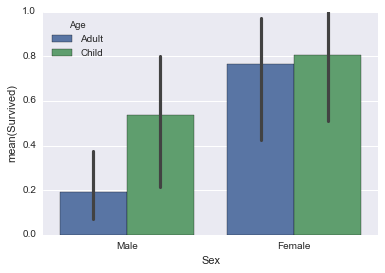

In [49]:
sns.barplot(x="Sex", y="Survived",hue=('Age'), data=groups_df)

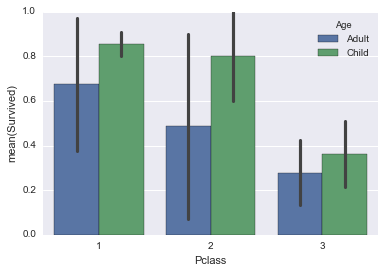

In [50]:
sns.barplot(x="Pclass", y="Survived",hue=('Age'), data=groups_df)

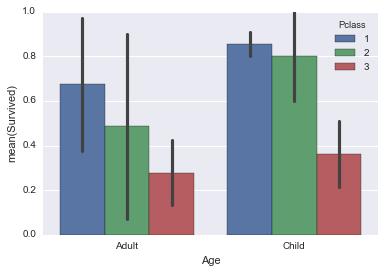

In [51]:
sns.barplot(x="Age", y="Survived",hue=('Pclass'), data=groups_df)

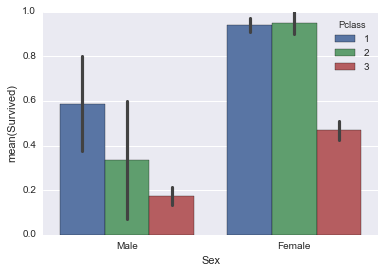

In [52]:
sns.barplot(x="Sex", y="Survived",hue=('Pclass'), data=groups_df)

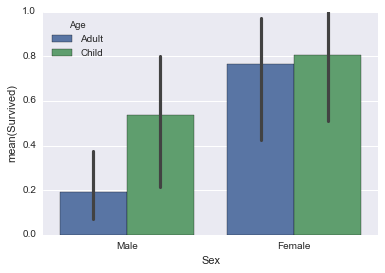

In [53]:
sns.barplot(x="Sex", y="Survived",hue=('Age'), data=groups_df)